# Regression Week 4: Ridge Regression (interpretation)
In this notebook, we will run ridge regression multiple times with different L2 penalties to see which one produces the best fit. We will revisit the example of polynomial regression as a means to see the effect of L2 regularization. In particular, we will:
Use a pre-built implementation of regression (GraphLab Create) to run polynomial regression
Use matplotlib to visualize polynomial regressions
Use a pre-built implementation of regression (GraphLab Create) to run polynomial regression, this time with L2 penalty
Use matplotlib to visualize polynomial regressions under L2 regularization
Choose best L2 penalty using cross-validation.
Assess the final fit using test data.
We will continue to use the House data from previous notebooks. (In the next programming assignment for this module, you will implement your own ridge regression learning algorithm using gradient descent.)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [5]:
x = np.array([2,3,4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.]])

In [6]:
sales = pd.read_csv('kc_house_data.csv')
sales = sales.sort(['sqft_living', 'price'])

C:\Users\Melissa\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [7]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
860,1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000


Make a 1 degree polynomial SFrame with sales[‘sqft_living’] as the the feature. Call it ‘poly1_data’.

In [8]:
poly1_data = sales['sqft_living']

Add sales[‘price’] to poly1_data as this will be our output variable. e.g.

In [10]:
def polynomial_Dframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_Dframe = pd.DataFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_Dframe['power_1']=feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_Dframe[name]=feature.apply(lambda x: x**power)
            #print poly_sframe
            print(poly_Dframe)

    return poly_Dframe
    

In [11]:
poly_data_1 = polynomial_Dframe(sales['sqft_living'], 1)
X_1 = poly_data_1
y = sales['price']
model= LinearRegression()
model.fit(X_1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print model.intercept_, model.coef_

-43580.7430945 [ 280.6235679]


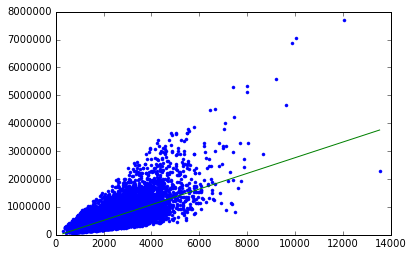

In [14]:
plt.plot(poly_data_1['power_1'],sales['price'],'.',
        poly_data_1['power_1'], model.predict(poly_data_1),'-');

Now that you have plotted the results using a 1st degree polynomial, try it again using a 2nd degree and 3rd degree polynomial. Look at the fitted lines, do they appear as you would expect

In [28]:
poly_data_2 = polynomial_Dframe(sales['sqft_living'], 2)
X_2 = poly_data_2
y = sales['price']
model= LinearRegression()
model.fit(X_2,y)

       power_1    power_2
19452      290      84100
15381      370     136900
860        380     144400
18379      384     147456
4868       390     152100
21332      390     152100
8623       410     168100
11500      420     176400
14466      420     176400
465        430     184900
1168       440     193600
18052      460     211600
12075      470     220900
15248      470     220900
17394      480     230400
8133       480     230400
4203       490     240100
4651       500     250000
2141       520     270400
3223       520     270400
18059      520     270400
2930       520     270400
6779       520     270400
9641       520     270400
12484      530     280900
3582       530     280900
7017       530     280900
14450      540     291600
12757      540     291600
18508      550     302500
...        ...        ...
12872     6980   48720400
15482     7000   49000000
7035      7050   49702500
4149      7080   50126400
7907      7100   50410000
21050     7120   50694400
6501      72

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
print model.intercept_, model.coef_

199222.279305 [  6.79940947e+01   3.85812609e-02]


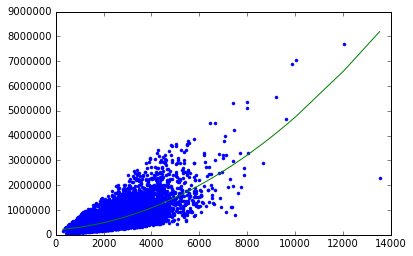

In [30]:
plt.plot(poly_data_2['power_1'],sales['price'],'.',
        poly_data_2['power_1'], model.predict(poly_data_2),'-');

In [33]:
l2_penalty = 1e-5

In [34]:
poly_data15 = polynomial_Dframe(sales['sqft_living'], 15)

       power_1    power_2
19452      290      84100
15381      370     136900
860        380     144400
18379      384     147456
4868       390     152100
21332      390     152100
8623       410     168100
11500      420     176400
14466      420     176400
465        430     184900
1168       440     193600
18052      460     211600
12075      470     220900
15248      470     220900
17394      480     230400
8133       480     230400
4203       490     240100
4651       500     250000
2141       520     270400
3223       520     270400
18059      520     270400
2930       520     270400
6779       520     270400
9641       520     270400
12484      530     280900
3582       530     280900
7017       530     280900
14450      540     291600
12757      540     291600
18508      550     302500
...        ...        ...
12872     6980   48720400
15482     7000   49000000
7035      7050   49702500
4149      7080   50126400
7907      7100   50410000
21050     7120   50694400
6501      72

In [35]:
X = poly_data15
y = sales['price']
model= Ridge(alpha=l2_penalty, normalize=True)
model.fit(X,y)

Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [36]:
print(model.intercept_)

Cff = pd.DataFrame(model.coef_, X.columns, columns = ['Coeff'])
Cff

227318.128908


,Coeff
power_1,7.078316e+01
power_2,1.349559e-02
power_3,8.701713e-06
power_4,-6.298076e-10
power_5,-1.943972e-14
power_6,-1.575039e-16
power_7,-4.604425e-16
power_8,3.422106e-16
power_9,-1.992208e-16
power_10,-2.503865e-16


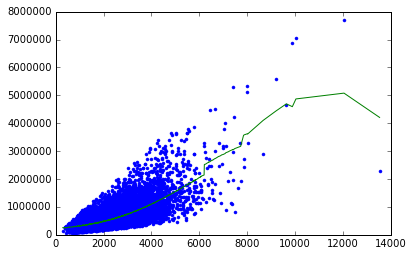

In [38]:
plt.plot(poly_data['power_1'],sales['price'],'.',
        poly_data['power_1'], model.predict(poly_data),'-');

# Really Low lambda for Ridge Regression

In [99]:
s_1 = pd.read_csv('wk3_kc_house_set_1_data.csv')

In [100]:
l2_penalty = 1e-9

In [101]:
poly_data = polynomial_Dframe(s_1['sqft_living'], 15)

      power_1    power_2
0         430     184900
1         460     211600
2         470     220900
3         490     240100
4         500     250000
5         520     270400
6         520     270400
7         520     270400
8         550     302500
9         560     313600
10        570     324900
11        580     336400
12        580     336400
13        590     348100
14        600     360000
15        620     384400
16        620     384400
17        630     396900
18        630     396900
19        630     396900
20        650     422500
21        660     435600
22        660     435600
23        660     435600
24        660     435600
25        670     448900
26        670     448900
27        670     448900
28        670     448900
29        680     462400
...       ...        ...
5374     5840   34105600
5375     5850   34222500
5376     5860   34339600
5377     6050   36602500
5378     6070   36844900
5379     6070   36844900
5380     6200   38440000
5381     6210   38564100


In [102]:
X = poly_data
y = s_1['price']
model= Ridge(alpha=1e-09, normalize=True)
model.fit(X,y)

Ridge(alpha=1e-09, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [103]:
print(model.intercept_)

Cff = pd.DataFrame(model.coef_, X.columns, columns = ['Coeff'])
Cff

227417.229043


,Coeff
power_1,6.238577e+01
power_2,1.982353e-02
power_3,7.565584e-06
power_4,-5.914914e-10
power_5,-1.962180e-14
power_6,1.868652e-16
power_7,-6.629094e-16
power_8,2.796260e-16
power_9,-1.810622e-16
power_10,-1.244046e-15


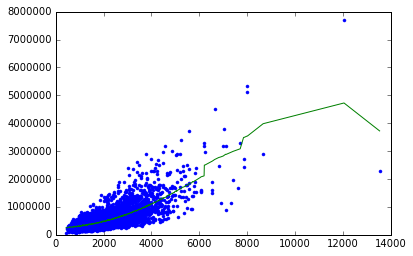

In [104]:
plt.plot(poly_data['power_1'],s_1['price'],'.',
        poly_data['power_1'], model.predict(poly_data),'-')

# Higher lambda for Ridge Regression

In [114]:
l2_penalty = 15

In [115]:
X = poly_data
y = s_1['price']
model= Ridge(alpha=l2_penalty, normalize=True)
model.fit(X,y)

Ridge(alpha=15, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [116]:
print(model.intercept_)

Cff = pd.DataFrame(model.coef_, X.columns, columns = ['Coeff'])
Cff

492788.343128


,Coeff
power_1,1.650192e+01
power_2,2.481096e-03
power_3,2.278605e-07
power_4,1.325153e-11
power_5,9.571294e-15
power_6,-1.291146e-16
power_7,7.243564e-17
power_8,-5.840896e-17
power_9,-6.181675e-17
power_10,-1.148991e-16


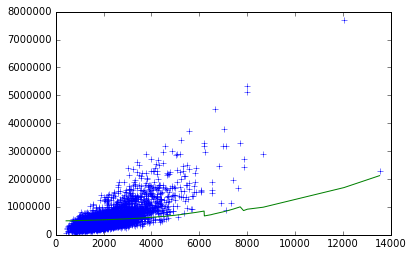

In [117]:
plt.plot(poly_data['power_1'],s_1['price'],'+',
        poly_data['power_1'], model.predict(poly_data),'-')